# Mohamad Faraj Makkawi

#### Workflow Steps

##### 1. Import Necessary Libraries
Import all required Python libraries (e.g., `numpy`, `pandas`, `scikit-learn`, `matplotlib`, `seaborn`, etc.).

##### 2. Download and Load, Preprocess the Dataset
Import the dataset and perform initial preprocessing tasks.

##### 3. Handle Missing Values (Imputation)
Identify and impute missing values appropriately.

##### 4. Normalize the Feature Data
Scale the features to ensure uniformity across data.

##### 5. Apply Principal Component Analysis (PCA)
Perform PCA to reduce dimensionality while retaining variance.

##### 6. Apply Linear Discriminant Analysis (LDA)
Apply LDA for supervised dimensionality reduction based on class separability.

##### 7. Apply Feature Selection (e.g., SelectKBest)
Use a feature selection technique like SelectKBest.  
**Note:** Ensure all feature values are non-negative if using statistical tests like `chi²`.

##### 8. Train a Random Forest Classifier
Train a Random Forest model on the original dataset (optionally, on reduced datasets too).

##### 9. Evaluate Model on Selected Features
Assess the model’s performance using the features selected by SelectKBest.

##### 10. Summarize Dimensions Used by Each Method
Summarize the number and nature of features retained by PCA, LDA, and feature selection methods.

##### 11. Visualize Dimension Reduction Results
Create plots to visualize the results of PCA, LDA, and feature selection.

##### 12. Visualize Accuracy Comparison
Compare and visualize the model's accuracy across different feature reduction techniques.

_________________________________________________________________________________________________________________________________________

Step 1: Import necessary libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import kagglehub

Step 2: Load and preprocess the dataset

In [113]:
path = kagglehub.dataset_download("zalando-research/fashionmnist") + '\\fashion-mnist_test.csv';
# Load the dataset
data = pd.read_csv( path )
print("Data path: " + path)

#  Split into features (X) and labels (Y)
Y = data.iloc[:, 0].values    # Labels (first column)
X = data.iloc[:, 1:].values   # Features (remaining 784 columns)

Data path: C:\Users\a\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4\fashion-mnist_test.csv


Step 3: Handle missing values (Imputation)

In [114]:
# Step 3: Check and handle missing data
missing = pd.DataFrame(X).isnull().sum()
missing_columns = missing[missing > 0]

print("Columns with missing values:")
print(missing_columns)

# Impute missing values with mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

Columns with missing values:
Series([], dtype: int64)


Step 4: Normalize the feature data

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

Step 5: Apply Principal Component Analysis (PCA)

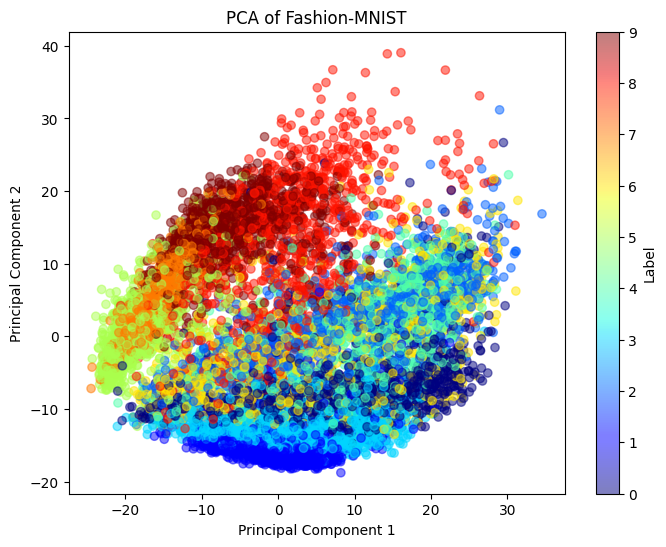

In [116]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='jet', alpha=0.5)
plt.colorbar(label='Label')
plt.title('PCA of Fashion-MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Step 6: Apply Linear Discriminant Analysis (LDA)

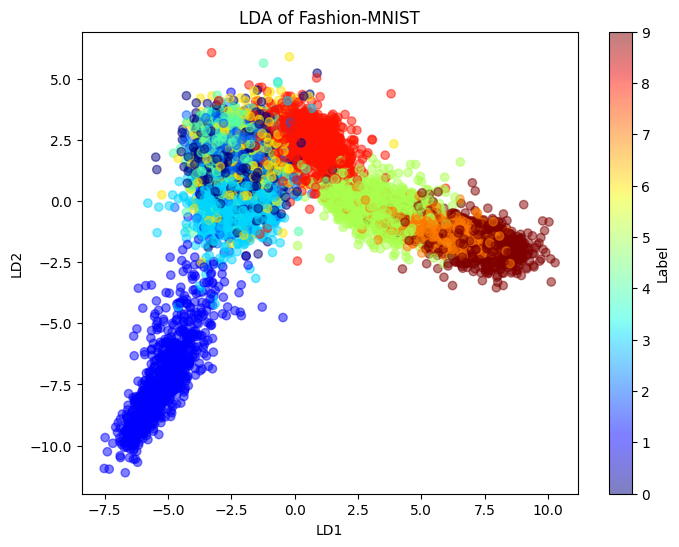

In [117]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, Y)  # Important: LDA needs both X and Y

# Step 8: Visualize LDA result
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=Y, cmap='jet', alpha=0.5)
plt.colorbar(label='Label')
plt.title('LDA of Fashion-MNIST')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

Step 7: Apply Feature Selection (e.g., SelectKBest) - Ensure non-negative values for chi2

Selected Features (Top 10): ['pixel253' 'pixel281' 'pixel308' 'pixel309' 'pixel310' 'pixel336'
 'pixel337' 'pixel338' 'pixel364' 'pixel365']


C:\Users\a\AppData\Local\Temp\ipykernel_18968\794017241.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')


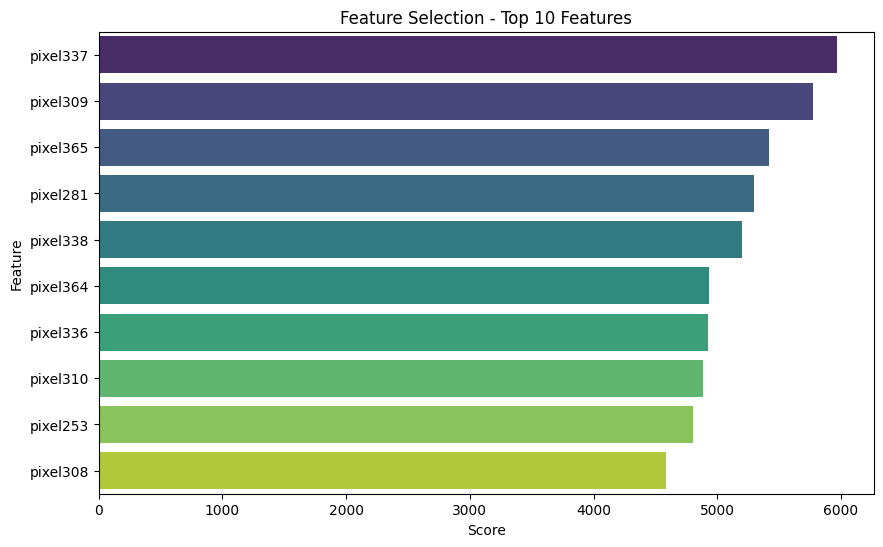

In [118]:
feature_names = [f'pixel{i}' for i in range(X.shape[1])]  # Create fake column names

# Apply a non-negative transformation
X_scaled_non_negative = np.abs(X_scaled)

# Apply SelectKBest
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(X_scaled_non_negative, Y)

# Get selected feature names
selected_columns = np.array(feature_names)[selector.get_support()]
print(f'Selected Features (Top 10): {selected_columns}')

# Visualize feature scores
feature_scores = pd.DataFrame({
    'Feature': selected_columns,
    'Score': selector.scores_[selector.get_support()]
}).sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Selection - Top 10 Features')
plt.show()

Step 8: Train a Random Forest Classifier on the original dataset (Optional, can be done on reduced datasets as well)

In [119]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on original dataset: {accuracy * 100:.2f}%')

# Print detailed classification report
print('\nClassification Report for original data:')
print(classification_report(y_test, y_pred))

# Optional: Evaluate the model performance on PCA reduced dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f'Accuracy on PCA reduced data: {accuracy_pca * 100:.2f}%')

# Optional: Evaluate the model performance on LDA reduced dataset
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, Y, test_size=0.2, random_state=42)
model.fit(X_train_lda, y_train_lda)
y_pred_lda = model.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
print(f'Accuracy on LDA reduced data: {accuracy_lda * 100:.2f}%')

Accuracy on original dataset: 86.35%

Classification Report for original data:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       192
           1       0.99      0.95      0.97       192
           2       0.75      0.79      0.77       212
           3       0.86      0.93      0.89       205
           4       0.79      0.87      0.83       204
           5       0.95      0.96      0.96       193
           6       0.70      0.51      0.59       200
           7       0.92      0.93      0.92       206
           8       0.95      0.95      0.95       196
           9       0.94      0.94      0.94       200

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Accuracy on PCA reduced data: 51.15%
Accuracy on LDA reduced data: 57.65%


Step 9: Evaluate model on selected features (from SelectKBest)

In [120]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
model.fit(X_train_sel, y_train_sel)
y_pred_sel = model.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
print(f'Accuracy on selected features: {accuracy_sel * 100:.2f}%')

Accuracy on selected features: 23.20%


Step 10: Summary of dimensions used by each method

In [121]:
original_dim = X.shape[1]
pca_dim = X_pca.shape[1]
lda_dim = X_lda.shape[1]
selected_dim = X_selected.shape[1]

print(f'\nFeature dimensions:')
print(f'Original: {original_dim} features')
print(f'PCA: {pca_dim} components')
print(f'LDA: {lda_dim} component')
print(f'SelectKBest: {selected_dim} features')


Feature dimensions:
Original: 784 features
PCA: 2 components
LDA: 2 component
SelectKBest: 10 features


Step 11: Visualize all dimension reduction results (PCA, LDA, Feature Selection)

C:\Users\a\AppData\Local\Temp\ipykernel_18968\1532041824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis', ax=axs[2])


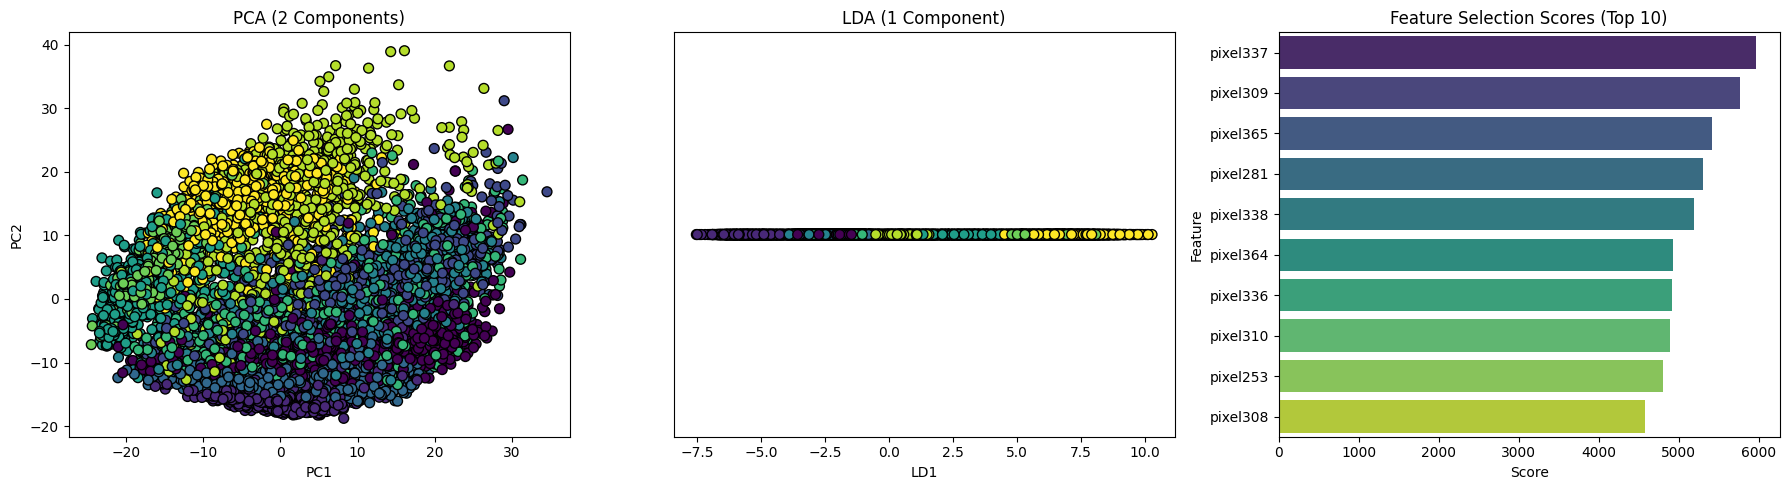

In [122]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# PCA plot
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k', s=50)
axs[0].set_title('PCA (2 Components)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# LDA plot
axs[1].scatter(X_lda[:, 0], [0]*len(X_lda), c=Y, cmap='viridis', edgecolor='k', s=50)  # Fixed here
axs[1].set_title('LDA (1 Component)')
axs[1].set_xlabel('LD1')
axs[1].set_yticks([])

# Feature Selection plot
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis', ax=axs[2])
axs[2].set_title('Feature Selection Scores (Top 10)')

plt.tight_layout()
plt.show()


Step 12: Visualize Accuracy Comparison

C:\Users\a\AppData\Local\Temp\ipykernel_18968\1009540464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Accuracy', data=accuracy_data, palette='mako')


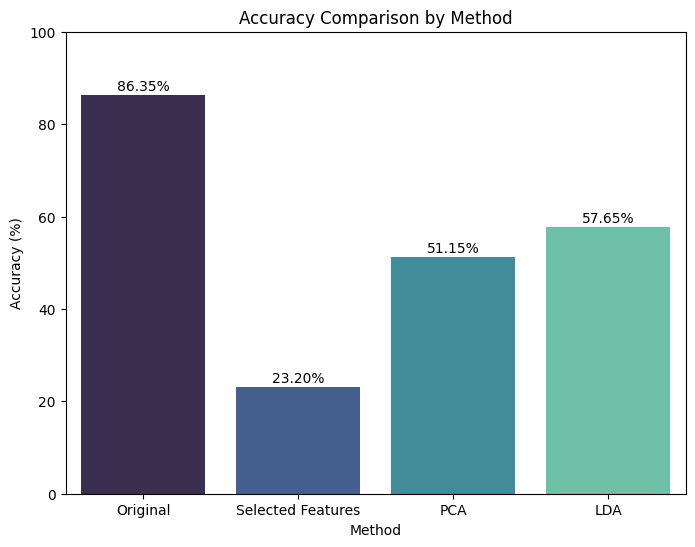

In [123]:
accuracy_data = pd.DataFrame({
    'Method': ['Original', 'Selected Features', 'PCA', 'LDA'],
    'Accuracy': [accuracy * 100, accuracy_sel * 100, accuracy_pca * 100, accuracy_lda * 100],
    'Features Used': [original_dim, selected_dim, pca_dim, lda_dim]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Method', y='Accuracy', data=accuracy_data, palette='mako')
plt.title('Accuracy Comparison by Method')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for index, row in accuracy_data.iterrows():
    plt.text(index, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center')
plt.show()